In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import random

# Implemented methods
methods = ['DynProg', 'ValIter']

# Some colours
LIGHT_RED    = '#FFC4CC'
LIGHT_GREEN  = '#95FD99'
BLACK        = '#000000'
WHITE        = '#FFFFFF'
LIGHT_PURPLE = '#E8D0FF'

In [2]:
from maze import Maze, dynamic_programming, value_iteration, animate_solution

In [3]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]])
# With the convention 0 = empty cell, 1 = obstacle, 2 = exit of the Maze

env = Maze(maze) # Create an environment maze
horizon = 20 # TODO: Finite horizon

# Solve the MDP problem with dynamic programming
V, policy = dynamic_programming(env, horizon)
print(V.shape, (V.min(), V.max()))
print(policy.shape, (policy.min(), policy.max()))

(2242, 20) (np.float64(-1900.0), np.float64(19.0))
(2242, 20) (np.float64(0.0), np.float64(4.0))


In [4]:
# Simulate the shortest path starting from position A
method = 'DynProg'
start  = ((0,0), (6,5))
path = env.simulate(start, policy, method)[0]
path

[((0, 0), (6, 5)),
 ((0, 1), (6, 6)),
 ((1, 1), (6, 7)),
 ((2, 1), (6, 6)),
 ((3, 1), (5, 6)),
 ((4, 1), (6, 6)),
 ((4, 2), (5, 6)),
 ((4, 3), (5, 7)),
 ((4, 4), (5, 6)),
 ((4, 5), (4, 6)),
 ((4, 6), (3, 6)),
 ((4, 7), (2, 6)),
 ((5, 7), (3, 6)),
 ((6, 7), (4, 6)),
 ((6, 6), (3, 6)),
 'Win',
 'Win',
 'Win',
 'Win',
 'Win']

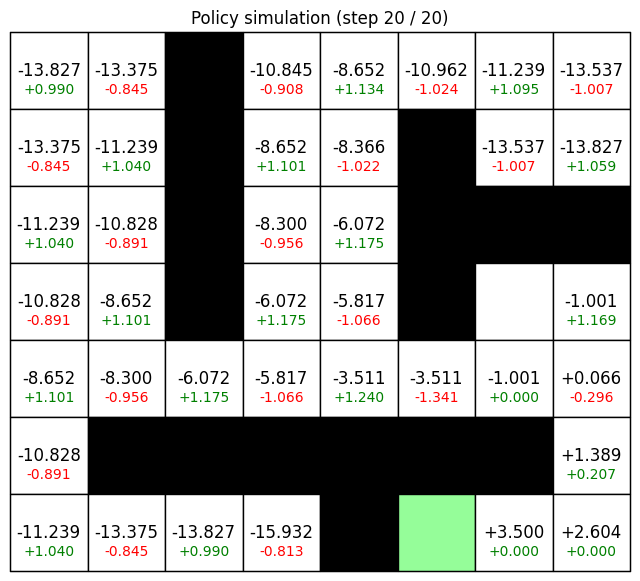

In [5]:
animate_solution(maze, path, V.T[0], env.map, 'outputs/values_both/', 0.1)